# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [4]:
#%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [5]:
#%pip install --upgrade plotly

### Import Statements

In [56]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import kaleido
import plotly
import plotly.graph_objs as go


# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [8]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [9]:
#df_data.shape
#4324 rows and 9 columns
spacedf = df_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
spacedf.sample(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
88,CASC,"LC-2, Xichang Satellite Launch Center, China","Mon Nov 04, 2019 17:43 UTC",Long March 3B/E | Beidou-3 IGSO-3,StatusActive,29.15,Success
134,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu May 30, 2019 17:42 UTC",Proton-M/Briz-M | Yamal-601,StatusActive,65.0,Success
1505,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Sat Jun 10, 1995 00:24 UTC",Ariane 42P | DBS-3,StatusRetired,NaN,Success
1485,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Fri Oct 20, 1995 13:53 UTC",Space Shuttle Columbia | STS-73,StatusRetired,450.0,Success
2876,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Mon Nov 17, 1975 14:36 UTC",Soyuz U | Soyuz 20,StatusRetired,NaN,Success
1441,ESA,"ELA-3, Guiana Space Centre, French Guiana, France","Tue Jun 04, 1996 12:34 UTC",Ariane 5 G | Cluster,StatusRetired,NaN,Failure
2902,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Fri Aug 22, 1975 02:11 UTC",Vostok-2M | Cosmos 756,StatusRetired,NaN,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
2856,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia","Tue Jan 20, 1976 17:07 UTC",Cosmos-3M (11K65M) | Cosmos 789,StatusRetired,NaN,Success
396,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Thu Nov 17, 2016 13:06 UTC",Ariane 5 ES | Galileo FOC FM7/FM12-FM14,StatusRetired,NaN,Success


In [10]:
spacedf.isna().sum()
#The price column has 3360 NaN values,the others are good

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [11]:
#Already removed the first 2 index columns
#Lets check for duplicates
#Only found one,everything seems to match while when only going by date there were 5 duplicates 
#but they had different models that were launched
duplicates = spacedf.duplicated(subset=["Date", "Detail"],keep='first')

spacedf[duplicates]




,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [12]:
spacedf = spacedf.drop_duplicates(subset=['Date', 'Detail'], keep='first')


## Descriptive Statistics

In [13]:
spacedf.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,963,4323
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3878


In [14]:
#56 Organizations, RVSN USSR being the top one with 1777 missions
#Also the cosmodrome being the number one launch site with 235 launches, and 137 locations in total
#3534 rockets are retired out of 4323
#3878 missions were successful

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [15]:
launchesorgs =  spacedf['Organisation'].value_counts().sort_values(ascending=False)[:20]

In [16]:

plt.figure(figsize=(14,8),dpi=200)
bar= px.bar(launchesorgs, 
             x=launchesorgs.values, 
             y=launchesorgs.index, 
             orientation='h', 
             title='Number of Launches per Organization',
             color=launchesorgs.values,
             color_continuous_scale='Electric')
bar.update_layout(coloraxis_showscale=False, xaxis_title = "Number of Launches", yaxis_title='Organisation name')
bar.update_layout(yaxis=dict(tickfont=dict(size=10)))
bar.show()


<Figure size 2800x1600 with 0 Axes>

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [17]:
activevsretired= spacedf['Rocket_Status'].value_counts().sort_values()
activevsretired

StatusActive      789
StatusRetired    3534
Name: Rocket_Status, dtype: int64

In [18]:
plt.figure(figsize=(14,8),dpi=200)

bar = px.bar(data_frame=activevsretired,x=activevsretired.index,
             y=activevsretired.values ,
             color=activevsretired.values,
             color_continuous_scale='portland')
bar.update_layout(coloraxis_showscale=False, xaxis_title = "Active vs retired rockets", 
                  yaxis_title='Number of Rockets')

bar.update_xaxes(ticktext=['Active', 'Retired'], tickvals=[0, 1])
bar.show()


<Figure size 2800x1600 with 0 Axes>

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [19]:
successvsfail = spacedf['Mission_Status'].value_counts().sort_values()
successvsfail

Prelaunch Failure       4
Partial Failure       102
Failure               339
Success              3878
Name: Mission_Status, dtype: int64

In [20]:
plt.figure(figsize=(14,8),dpi=200)

bar = px.bar(data_frame=successvsfail,x=successvsfail.index,
             y=successvsfail.values ,
             color=successvsfail.values,
             color_continuous_scale='portland',
             log_y=True)
bar.update_layout(coloraxis_showscale=False, xaxis_title = "Active vs retired rockets", 
                  yaxis_title='Number of Rockets')

bar.update_xaxes(ticktext=['Prelaunch Failure', 'Partial Failure', 'Failure', 'Success'], tickvals=[0, 1,2,3])
bar.show()

<Figure size 2800x1600 with 0 Axes>

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [21]:
prices = spacedf['Price'].dropna().sort_values()
prices

3683    1,160.0
3149    1,160.0
3180    1,160.0
3243    1,160.0
3384    1,160.0
         ...   
510        90.0
365        90.0
146        90.0
236        90.0
569        90.0
Name: Price, Length: 963, dtype: object

In [22]:
fig = px.histogram(prices, x=prices.values, 
                   nbins=20,
                   title='Distribution of Space Mission Prices',
                   #histfunc='density'
                   )

fig.update_xaxes(title_text='Price')
fig.update_yaxes(title_text='Frequency')
fig.update_layout(xaxis=dict(tickfont=dict(size=10)))
fig.update_layout(yaxis=dict(tickfont=dict(size=10)))
fig.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [23]:

#spacedf['Location']
spacedf['Country'] = spacedf['Location'].str.rsplit(',',1).str[-1].str.strip()
#spacedf.drop('Country', axis=1, inplace=True)
spacedf.sample(10)

C:\Users\User\AppData\Local\Temp\ipykernel_5400\714557286.py:2: FutureWarning:

In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.



,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
1541,VKS RF,"Site 45/1, Baikonur Cosmodrome, Kazakhstan","Fri Nov 04, 1994 05:47 UTC",Zenit-2 | Resurs-O1 n†­3,StatusRetired,NaN,Success,Kazakhstan
1188,ILS,"SLC-36B, Cape Canaveral AFS, Florida, USA","Fri Jul 14, 2000 05:21 UTC",Atlas IIAS | Echostar 6,StatusRetired,NaN,Success,USA
3087,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Tue Nov 20, 1973 12:29 UTC",Cosmos-2I (63SM) | Cosmos 608,StatusRetired,NaN,Success,Russia
2060,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia","Fri Jun 06, 1986 03:57 UTC",Cosmos-3M (11K65M) | Cosmos 1748 to 1755,StatusRetired,NaN,Success,Russia
1419,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Thu Oct 24, 1996 11:37 UTC",Molniya-M /Block ML | Molniya-3 n†­165,StatusRetired,NaN,Success,Russia
4025,General Dynamics,"SLC-4E, Vandenberg AFB, California, USA","Fri Aug 14, 1964 22:00 UTC",Atlas-SLV3 Agena-D | KH-7 Gambit 4010,StatusRetired,NaN,Success,USA
593,Land Launch,"Site 45/1, Baikonur Cosmodrome, Kazakhstan","Sat Aug 31, 2013 20:05 UTC",Zenit-3 SLB | AMOS 4,StatusActive,NaN,Success,Kazakhstan
1068,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Tue Dec 17, 2002 23:04 UTC",Ariane 44L | NSS-6,StatusRetired,NaN,Success,France
3543,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Tue Jul 22, 1969 12:55 UTC",Molniya-M /Block L | Molniya-1 n†­18,StatusRetired,NaN,Success,Kazakhstan
4040,General Dynamics,"SLC-4W, Vandenberg AFB, California, USA","Tue May 19, 1964 19:21 UTC",Atlas-LV3 Agena-D | KH-7 Gambit 4008,StatusRetired,NaN,Success,USA


In [24]:
#Renaming countries
#The trailing spaces were stopping me from changing before
#I removed the trailing spaces and now it works
spacedf['Country'].replace({"Russia": "Russian Federation", 
                            "New Mexico": "USA",
                            "Yellow Sea": "China",
                            "Shahrud Missile Test Site": "Iran",
                            "Pacific Missile Range Facility":"USA",
                            "Barents Sea": "Russian Federation",
                            "Gran Canaria":"USA",
                            "Pacific Ocean":"USA"
                            }, 
                           inplace=True)
spacedf.replace({'Country': {'USA': 'United States of America', 
                             'North Korea':'Korea, Democratic People\'s Republic of',
                             "Iran":'Iran, Islamic Republic of',
                             "South Korea":'Korea, Republic of'}}, inplace=True)
spacedf.groupby("Country",as_index=False).count()

,Country,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,Australia,6,6,6,6,6,0,6
1,Brazil,3,3,3,3,3,0,3
2,China,268,268,268,268,268,158,268
3,France,303,303,303,303,303,95,303
4,India,76,76,76,76,76,67,76
5,"Iran, Islamic Republic of",14,14,14,14,14,0,14
6,Israel,11,11,11,11,11,0,11
7,Japan,126,126,126,126,126,40,126
8,Kazakhstan,701,701,701,701,701,46,701
9,Kenya,9,9,9,9,9,0,9


# Use a Choropleth Map to Show the Number of Failures by Country


In [25]:
#Missing countries
#Iran,North Korea
# create a dictionary of country names to 3 letter ISO codes
country_codes = {country.name: country.alpha3 for country in countries}
country_codes['Korea, Republic of']

# use the map function to convert the country names to ISO codes and set a default value for missing countries
spacedf['Iso'] = spacedf['Country'].map(country_codes).fillna("Missing")

#i am losing 5 countries for some reason
prizespercountry = spacedf.groupby("Iso",as_index=False).agg({'Location':pd.Series.count}).sort_values(by='Location',ascending=True)
prizespercountry


,Iso,Location
1,BRA,3
10,KOR,3
12,PRK,5
0,AUS,6
9,KEN,9
6,ISR,11
11,NZL,13
5,IRN,14
4,IND,76
7,JPN,126


In [26]:
fig= px.choropleth(prizespercountry,locations='Iso',color='Location',hover_name='Iso',
                   color_continuous_scale=px.colors.sequential.matter )
fig.show()


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [27]:
top_organizations = spacedf.groupby(['Country', 'Organisation', 'Mission_Status'],as_index=False).agg({'Location':pd.Series.count}).sort_values(by='Location',ascending=True)
top_organizations


,Country,Organisation,Mission_Status,Location
0,Australia,AMBA,Success,1
38,Japan,ISAS,Partial Failure,1
40,Japan,JAXA,Failure,1
46,Japan,UT,Success,1
48,Kazakhstan,ILS,Partial Failure,1
...,...,...,...,...
103,United States of America,General Dynamics,Success,203
9,China,CASC,Success,230
19,France,Arianespace,Success,267
58,Kazakhstan,RVSN USSR,Success,495


In [28]:
fig = px.sunburst(top_organizations, path=['Country', 'Organisation','Mission_Status'], 
                  values='Location',
                   hover_data=['Location'],
                   title="Which organisations are doing the heavy lifting")
fig.update_layout(coloraxis_showscale = False,xaxis_title='Number of Missions', 
                    yaxis_title='Organisation')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [29]:
## Continue here
removednoprice = spacedf.dropna(subset=['Price'])

removednoprice.groupby('Organisation').count()
removednoprice['Price'] = pd.to_numeric(removednoprice['Price'], errors='coerce')



C:\Users\User\AppData\Local\Temp\ipykernel_5400\1940947634.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
priceperorg = removednoprice.groupby("Organisation",as_index=False).agg({'Price':pd.Series.sum}).sort_values(by='Price',ascending=True)
priceperorg.dropna()
#priceperorg['Price'] = priceperorg['Price'].apply(lambda x: x.replace('.', ','))
#priceperorg['Price'] = pd.to_numeric(removednoprice['Price'], errors='coerce')
priceperorg


,Organisation,Price
16,RVSN USSR,0.00
24,Virgin Orbit,12.00
19,Sandia,15.00
3,EER,20.00
6,ExPace,28.30
4,ESA,37.00
17,Rocket Lab,97.50
9,JAXA,168.00
11,Lockheed,280.00
5,Eurockot,543.40


In [31]:
fig = px.pie(values = priceperorg['Price'], labels=priceperorg['Organisation'],names=priceperorg['Organisation'])
fig.update_layout(showlegend = True)
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [32]:

removednoprice['Price'] = pd.to_numeric(removednoprice['Price'], errors='coerce')
priceperlaunch = removednoprice.groupby("Organisation",as_index=False).agg({'Price': pd.Series.mean}).sort_values(by='Price',ascending=True)

priceperlaunch.dropna()

C:\Users\User\AppData\Local\Temp\ipykernel_5400\484918129.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Price
17,Rocket Lab,7.50
24,Virgin Orbit,12.00
19,Sandia,15.00
3,EER,20.00
6,ExPace,28.30
10,Kosmotras,29.00
8,ISRO,32.49
11,Lockheed,35.00
4,ESA,37.00
2,CASC,40.19


In [33]:
trace = go.Bar(x=priceperlaunch['Organisation'].iloc[:-1], y=priceperlaunch['Price'].iloc[:-1],
               marker=dict(color=priceperlaunch['Price'],
                           colorscale='portland', showscale=True))

data = [trace]
layout = go.Layout(title='Average cost of a space launch per organization',
                   xaxis=dict(title='Organization'),
                   yaxis=dict(title='Average cost'))
fig = go.Figure(data=data, layout=layout)
fig.show()


# Chart the Number of Launches per Year

In [34]:
spacedf["Date"] = pd.to_datetime(spacedf["Date"],utc=True)
spacedf['Date']
spacedf['Year'] = spacedf['Date'].dt.year
spacedf.sample(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Iso,Year
53,MHI,"LA-Y1, Tanegashima Space Center, Japan",2020-02-09 01:34:00+00:00,H-IIA 202 | IGS-Optical 7,StatusActive,90.0,Success,Japan,JPN,2020
2094,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1985-11-06 17:00:00+00:00,Space Shuttle Challenger | STS-61-A,StatusRetired,450.0,Success,United States of America,USA,1985
1846,CASC,"LC-3, Xichang Satellite Launch Center, China",1990-02-04 12:28:00+00:00,Long March 3 | DFH-2A-T4,StatusRetired,NaN,Success,China,CHN,1990
4166,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1962-04-26 10:02:00+00:00,Vostok | Cosmos 4,StatusRetired,NaN,Success,Kazakhstan,KAZ,1962
1483,EER,"LP-0A, Wallops Flight Facility, Virginia, USA",1995-10-23 22:03:00+00:00,Conestoga-1620 | METEOR,StatusRetired,20.0,Failure,United States of America,USA,1995
802,Sea Launch,"LP Odyssey, Kiritimati Launch Area, Pacific Ocean",2008-09-24 09:27:00+00:00,Zenit-3 SL | Galaxy 19,StatusActive,NaN,Success,United States of America,USA,2008
2642,General Dynamics,"LC-13, Cape Canaveral AFS, Florida, USA",1977-12-11 22:45:00+00:00,Atlas-SLV3A Agena-D | OPS-4258 (Aquacade-3),StatusRetired,NaN,Success,United States of America,USA,1977
1463,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France",1996-02-05 07:19:00+00:00,Ariane 44P | N-Star B,StatusRetired,NaN,Success,France,FRA,1996
431,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2016-06-15 14:29:00+00:00,Falcon 9 Block 3 | ABS-2A & Eutelsat 117 West B,StatusRetired,62.0,Success,United States of America,USA,2016
3044,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",1974-04-29 17:10:00+00:00,Cosmos-3M (11K65M) | Cosmos 650,StatusRetired,NaN,Success,Russian Federation,RUS,1974


In [35]:
launchesperyear = spacedf.groupby("Year",as_index=False).agg({'Rocket_Status': pd.Series.count})
launchesperyear


,Year,Rocket_Status
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


In [36]:
fig = px.line(launchesperyear[:-1], 
              x='Year', 
              y='Rocket_Status', 
              labels={'Year':'Year',
                      'Rocket_Status':'Number of Launches'},
              title='Number of Launches per Year', 
              template='plotly_dark')
fig.write_image("LaunchesPerYear.png", format='png')
fig.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [37]:
spacedf['Month'] = spacedf['Date'].dt.to_period("M")
launchpermonth = spacedf.groupby(["Month"],as_index=False).agg({'Rocket_Status': pd.Series.count}).astype(str)

launchpermonth['Rocket_Status'] = pd.to_numeric(launchpermonth['Rocket_Status'])
#launchpermonth.describe()
#launchpermonth['Rocket_Status'].idxmax()
#launchpermonth.loc[164]
#18 launches in one day in 1971-12

C:\Users\User\AppData\Local\Temp\ipykernel_5400\188656817.py:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [38]:
fig = px.line(launchpermonth, x='Month', y='Rocket_Status', 
              labels={'Month':'Month','Rocket_Status':'Number of Launches'},
              title='Number of Launches per Month')
fig.show()
#fig.write_image("LaunchesPerYear.png", format='png')



In [39]:

launchpermonth['rolling_average'] = launchpermonth['Rocket_Status'].rolling(window=6).mean()
fig = px.line(launchpermonth, 
              x='Month', 
              y='Rocket_Status', 
              labels={'Month':'Month','Rocket_Status':'Number of Launches'},
              title='Number of Launches per Month')
rolling_average_trace = go.Scatter(x=launchpermonth['Month'], 
                                   y=launchpermonth['rolling_average'],
                                   mode='lines',
                                   line=dict(color='black', width=2))
fig.add_trace(rolling_average_trace)
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [40]:
spacedf['justmonth'] = spacedf['Date'].dt.month
monthpopularity = spacedf.groupby(["justmonth"],as_index=False).agg({'Rocket_Status': pd.Series.count}).sort_values(by='Rocket_Status', ascending=True)
monthpopularity


,justmonth,Rocket_Status
0,1,268
4,5,326
10,11,335
1,2,336
6,7,351
2,3,353
8,9,365
7,8,373
9,10,381
3,4,383


In [41]:
fig = px.pie(values = monthpopularity['Rocket_Status'], labels=monthpopularity['justmonth'],names=monthpopularity['justmonth'])
fig.update_layout(showlegend = True)
fig.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [42]:
#removednoprice2 = spacedf.dropna(subset=['Price'])
#removednoprice2['Price'] = pd.to_numeric(removednoprice['Price'], errors='coerce')
#removednoprice2['Price']

#removednoprice2 = removednoprice2.groupby(["Year"],as_index=False).agg({'Price': pd.Series.mean})
#removednoprice2

In [43]:
#fig = px.line(removednoprice2, 
#              x='Year', 
#              y='Price', 
#              labels={'Year':'Year',
#                      'Price':'Average cost of a launch'},
#              title='Average cost of a launch per year', 
#              template='plotly_dark')
#fig.show()
#

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [44]:
#top10orgs = spacedf.groupby(['Organisation','Year'],as_index=False).agg({'Rocket_Status': pd.Series.count})
org_year_launches = spacedf.groupby(['Organisation','Year'],as_index=False).count()

org_launches = spacedf.groupby('Organisation', as_index=False)['Rocket_Status'].count()

# Select the top 10 organizations by number of launches
top_orgs = org_launches.nlargest(10, 'Rocket_Status')['Organisation']
top_org_launches = org_year_launches[org_year_launches['Organisation'].isin(top_orgs)]


In [45]:
fig = px.line(top_org_launches, 
              x='Year', 
              y='Rocket_Status', 
              color='Organisation', 
              labels={'Year':'Year', 'Rocket_Status':'Number of Launches'}, 
              title='Number of Launches per Year per Top Organisation')
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [46]:
target_countries = ["Russian Federation", "United States of America"]
cold_war = spacedf.replace({'Country': {'Kazakhstan': 'Russian Federation', }})
cold_war = cold_war.groupby(['Country','Year'],as_index=False).count()
#This only filters for countires
#cold_war = cold_war[cold_war['Country'].isin(target_countries)]

#These both work 
#cold_war = cold_war.query('Year<=1991 and Country in @target_countries')
#cold_war.replace({'Country': {'Kazakhstan': 'Russian Federation', }},inplace=True)

cold_war = cold_war[(cold_war['Year'] <= 1991) & cold_war['Country'].isin(target_countries)]


In [47]:
fig = px.line(cold_war, 
              x='Year', 
              y='Rocket_Status', 
              color='Country', 
              labels={'Year':'Year', 'Rocket_Status':'Number of Launches'}, 
              title='How close was it? Comparing Cold War launches')
fig.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [48]:
#Continue here
#I need to include kazakhstan above also in the coldwar dataframe

In [49]:
cold_war_launches = cold_war.groupby("Country",as_index=False).agg({'Rocket_Status':pd.Series.sum})
usa_launches = cold_war_launches[cold_war_launches['Country'] == 'United States of America']['Rocket_Status'].values[0]
ussr_launches = cold_war_launches[cold_war_launches['Country'] == 'Russian Federation']['Rocket_Status'].values[0]

fig = px.pie(values=[usa_launches, ussr_launches],
            names=['USA', 'USSR'],
            title='Launches between USSR and USA during the Cold War')

fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [50]:
cold_war_launches = cold_war.groupby(["Country","Year"],as_index=False).agg({'Rocket_Status':pd.Series.sum})

#creating two different dataframes for the two countries
usa_launches = cold_war_launches[cold_war_launches['Country'] == 'United States of America']
ussr_launches = cold_war_launches[cold_war_launches['Country'] == 'Russian Federation']


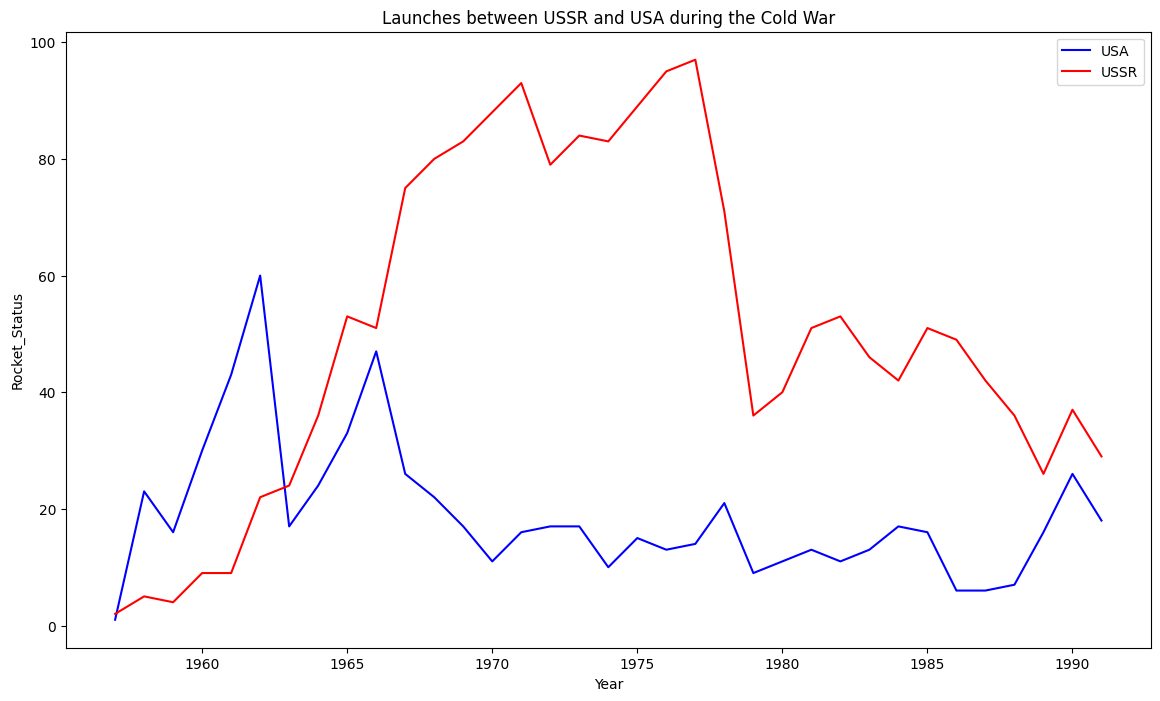

In [51]:
plt.figure(figsize=(14,8))
plt.plot(usa_launches['Year'], usa_launches['Rocket_Status'], 'b', label='USA')
plt.plot(ussr_launches['Year'], ussr_launches['Rocket_Status'], 'r', label='USSR')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Rocket_Status')
plt.title('Launches between USSR and USA during the Cold War')
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [81]:
successandfail = spacedf.groupby(["Year",'Mission_Status'],as_index=False).count()
successandfail
failed = successandfail[(successandfail['Mission_Status'] == 'Failure')]
prelaunchfail = successandfail[(successandfail['Mission_Status'] == 'Prelaunch Failure')]
partial = successandfail[(successandfail['Mission_Status'] == 'Partial Failure')]
merged_df = pd.concat([failed, prelaunchfail,partial], ignore_index=True, join='inner', keys='Year')
merged_df.groupby("Year",as_index=False).agg({'Rocket_Status':pd.Series.sum})

,Year,Rocket_Status
0,1957,1
1,1958,22
2,1959,12
3,1960,20
4,1961,20
...,...,...
59,2016,4
60,2017,8
61,2018,4
62,2019,9


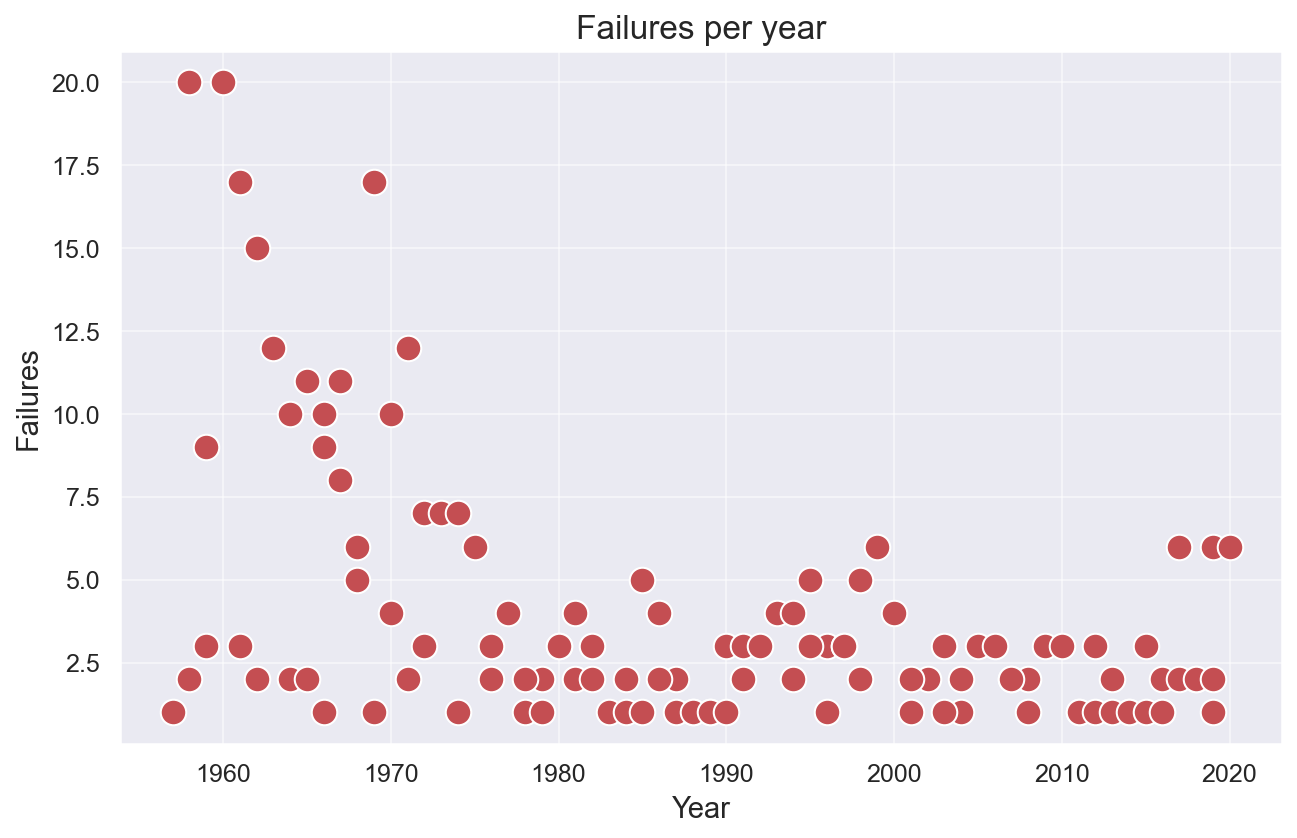

In [83]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6), dpi=150)
sns.scatterplot(x='Year', y='Rocket_Status', data=merged_df, color='r', s=150)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Failures', fontsize=14)
plt.title('Failures per year', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True,alpha=0.5)
plt.savefig("chart.png", dpi=300)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [91]:
launchesperyear = spacedf.groupby("Year",as_index=False).agg({'Rocket_Status':pd.Series.count})
percentageofailure = merged_df['Rocket_Status'] / launchesperyear['Rocket_Status'] *100
percentageofailure[:64]
launchesperyear['Percentage'] = percentageofailure[:64]
launchesperyear

,Year,Rocket_Status,Percentage
0,1957,3,33.33
1,1958,28,71.43
2,1959,20,45.00
3,1960,39,51.28
4,1961,52,32.69
...,...,...,...
59,2016,90,2.22
60,2017,92,6.52
61,2018,117,1.71
62,2019,109,5.50


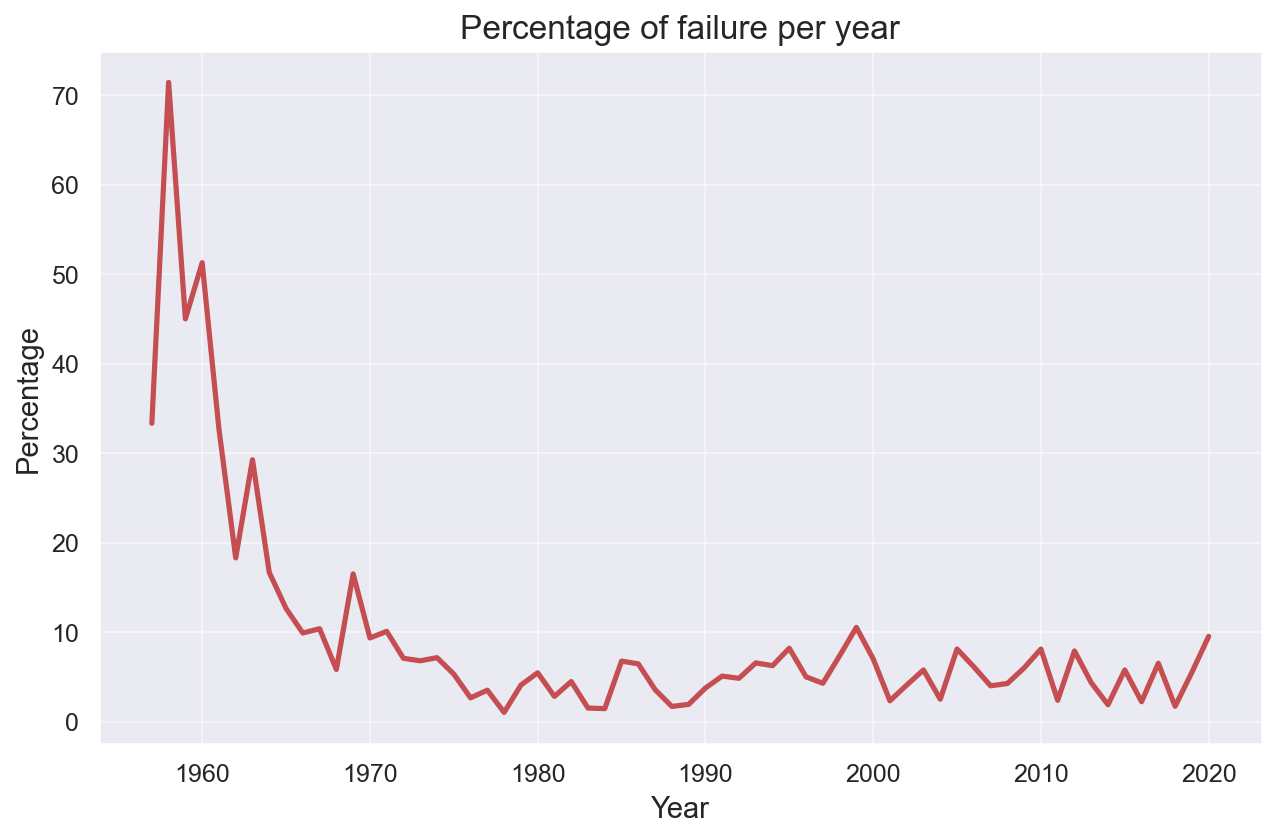

In [93]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10, 6), dpi=150)
plt.plot(launchesperyear['Year'], launchesperyear['Percentage'], 'r-', linewidth=2.5)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Percentage of failure per year', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True,alpha=0.5)
plt.savefig("chart.png", dpi=300)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [127]:
topcountry_year = spacedf.replace({'Country': {'Kazakhstan': 'Russian Federation', }})
topcountry_year = topcountry_year.groupby(['Year','Country'],as_index=False).count()
topcountry_year = topcountry_year.sort_values(by='Mission_Status', ascending=False)
topcountry_year = topcountry_year.drop_duplicates(subset='Year')
topcountry_year.sort_values(by='Year',inplace=True)
topcountry_year.head(20)

,Year,Country,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Iso,Month,justmonth
0,1957,Russian Federation,2,2,2,2,2,0,2,2,2,2
3,1958,United States of America,23,23,23,23,23,0,23,23,23,23
5,1959,United States of America,16,16,16,16,16,0,16,16,16,16
7,1960,United States of America,30,30,30,30,30,0,30,30,30,30
9,1961,United States of America,43,43,43,43,43,0,43,43,43,43
11,1962,United States of America,60,60,60,60,60,0,60,60,60,60
12,1963,Russian Federation,24,24,24,24,24,0,24,24,24,24
14,1964,Russian Federation,36,36,36,36,36,0,36,36,36,36
17,1965,Russian Federation,53,53,53,53,53,0,53,53,53,53
21,1966,Russian Federation,51,51,51,51,51,0,51,51,51,51


In [131]:
topcountry_year_success = spacedf.replace({'Country': {'Kazakhstan': 'Russian Federation', }})
topcountry_year_success = topcountry_year_success.groupby(['Year','Country',"Mission_Status"],as_index=False).count()
topcountry_year_success[topcountry_year_success['Mission_Status']== "Success"]
topcountry_year_success = topcountry_year_success.sort_values(by='Organisation', ascending=False)
topcountry_year_success = topcountry_year.drop_duplicates(subset='Year')
topcountry_year_success.sort_values(by='Year',inplace=True)
#topcountry_year_success.head(20)

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [134]:
toporg_year = spacedf.groupby(['Year','Organisation'],as_index=False).count()
toporg_year = toporg_year.sort_values(by='Organisation', ascending=False)
toporg_year = toporg_year.drop_duplicates(subset='Year')
toporg_year.sort_values(by='Year',inplace=True)
toporg_year
#VKS RF for 2018,i-Space for 2019 and Virgin Orbit for 2020

,Year,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Iso,Month,justmonth
1,1957,US Navy,1,1,1,1,0,1,1,1,1,1
6,1958,US Navy,12,12,12,12,0,12,12,12,12,12
11,1959,US Navy,4,4,4,4,0,4,4,4,4,4
15,1960,US Air Force,21,21,21,21,0,21,21,21,21,21
19,1961,US Air Force,23,23,23,23,0,23,23,23,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...
595,2016,VKS RF,4,4,4,4,4,4,4,4,4,4
613,2017,VKS RF,6,6,6,6,3,6,6,6,6,6
629,2018,VKS RF,5,5,5,5,4,5,5,5,5,5
647,2019,i-Space,1,1,1,1,0,1,1,1,1,1
